In [ ]:
import pandas as pd
data = {
    'OrderID': [1001, 1002, 1003, 1004, 1005],
    'Date': ['2025-01-01', '2025-10-01', '2025-03-02', '2025-05-03','2025-10-02'],
    'CustomerID': ['C001', 'C002', 'C001', 'C003','C004'],
    'Product': ['Laptop', 'Monitor', 'Mouse', 'Keyboard','Laptop'],
    'Quantity': [1, 2, 3, 1, 1],
    'Price': [1200.00, 300.00, 25.00, 75.00, 1200.00]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df)

   OrderID        Date CustomerID   Product  Quantity   Price
0     1001  2025-01-01       C001    Laptop         1  1200.0
1     1002  2025-10-01       C002   Monitor         2   300.0
2     1003  2025-03-02       C001     Mouse         3    25.0
3     1004  2025-05-03       C003  Keyboard         1    75.0
4     1005  2025-10-02       C004    Laptop         1  1200.0


Convert Date to datetime format.

In [ ]:
df.dtypes

,0
OrderID,int64
Date,object
CustomerID,object
Product,object
Quantity,int64
Price,float64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

,0
OrderID,int64
Date,datetime64[ns]
CustomerID,object
Product,object
Quantity,int64
Price,float64


In [ ]:
df["Month"] = df["Date"].dt.month
df

,OrderID,Date,CustomerID,Product,Quantity,Price,Month
0,1001,2025-01-01,C001,Laptop,1,1200.0,1
1,1002,2025-10-01,C002,Monitor,2,300.0,10
2,1003,2025-03-02,C001,Mouse,3,25.0,3
3,1004,2025-05-03,C003,Keyboard,1,75.0,5
4,1005,2025-10-02,C004,Laptop,1,1200.0,10


In [ ]:
df.groupby('Product')['Price'].sum()

,Price
Product,
Keyboard,75.0
Laptop,2400.0
Monitor,300.0
Mouse,25.0


Monthly revenue trend

In [ ]:
import matplotlib.pyplot as plt

df['Revenue'] = df['Quantity'] * df['Price']
df['Revenue']

,Revenue
0,1200.0
1,600.0
2,75.0
3,75.0
4,1200.0


In [ ]:
monthly_revenue = df.groupby('Month')['Revenue'].sum()
monthly_revenue

,Revenue
Month,
1,1200.0
3,75.0
5,75.0
10,1800.0


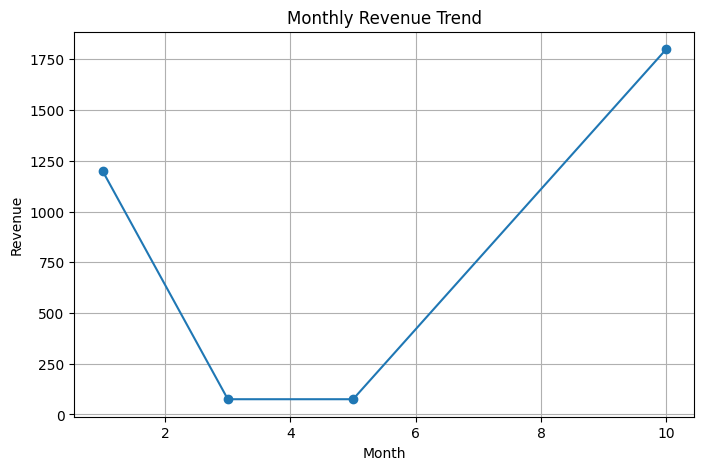

In [ ]:
plt.figure(figsize=(8,5))
monthly_revenue.plot(kind="line", marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

In [ ]:
customer_spending = df.groupby('CustomerID')['Revenue'].sum()
customer_spending

,Revenue
CustomerID,
C001,1275.0
C002,600.0
C003,75.0
C004,1200.0


In [ ]:
top_customers = customer_spending.nlargest(3)
top_customers

,Revenue
CustomerID,
C001,1275.0
C004,1200.0
C002,600.0


In [ ]:
best_month = monthly_revenue.idxmax()
highest_value = monthly_revenue.max()
best_month

np.int32(10)

In [ ]:
highest_value

1800.0